      previously after building logistic regression we saw how we can improve the accuracy of our model let us apply it here and create an Artificial 
      Neural Network and check if the performance and accuracy will increase or not

### Importing necessary libraries

In [759]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [760]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/diabetes prediction/diabetes.csv"
data = pd.read_csv(file)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [761]:
df= data.copy()
df.columns = df.columns.str.lower()

In [762]:
numerical_features = [feature for feature in df.columns if len(df[feature].unique())>20]
numerical_features

['glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age']

In [763]:
for feature in numerical_features:
  print(feature,":",np.round(df[feature].mean(),2))

glucose : 120.89
bloodpressure : 69.11
skinthickness : 20.54
insulin : 79.8
bmi : 31.99
diabetespedigreefunction : 0.47
age : 33.24


- we will impute the mean to all the columns which contains 0 in it excluding pregnancy,diabetespedegreefunction
- we can do it via pandas or via excel 

In [764]:
def zero_values(feature):
  if (df[feature] == 0).any():
    print('some values have 0 in it')
  else:
    print('we do not have 0')

In [765]:
zero_values('glucose')

some values have 0 in it


In [766]:
def impute_mean(feature):
  df[feature].replace(0,df[feature].mean(axis=0),inplace=True)

In [767]:
impute_mean('glucose')

In [768]:
impute_mean('bmi')

In [769]:
impute_mean('bloodpressure')

In [770]:
impute_mean('skinthickness')

In [771]:
impute_mean('insulin')

#### Transforming features into normal distribution

In [772]:
def log_continuos(feature):
  plt.figure(figsize =(13,5))
  plt.subplot(1,2,1)
  sns.distplot(df[feature],fit=norm)
  plt.title("Before log transformation")

  plt.subplot(1,2,2)
  df[feature] = np.sqrt(df[feature])
  sns.distplot(df[feature],fit=norm)
  plt.title("After log transformation")
  plt.show()

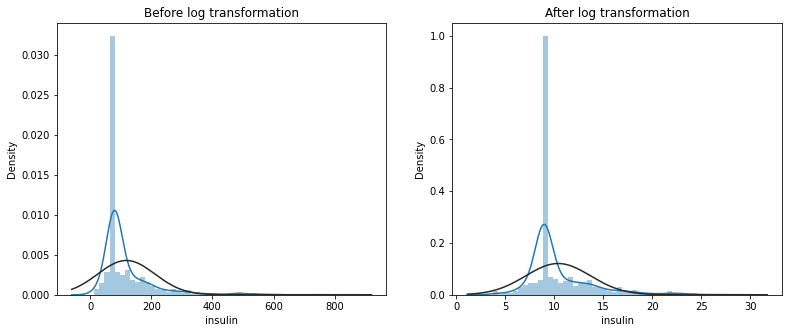

In [773]:
log_continuos('insulin')

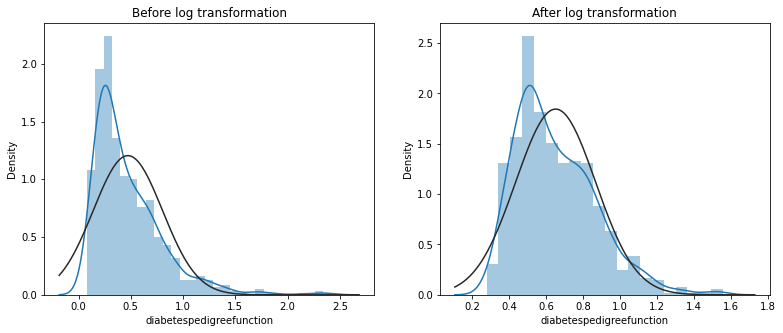

In [774]:
log_continuos('diabetespedigreefunction')

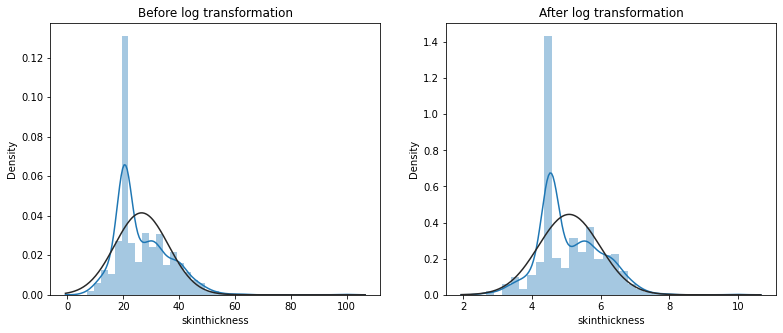

In [775]:
log_continuos('skinthickness')

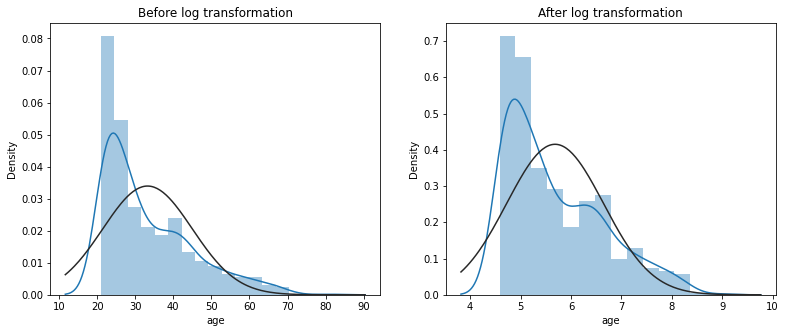

In [776]:
log_continuos('age')

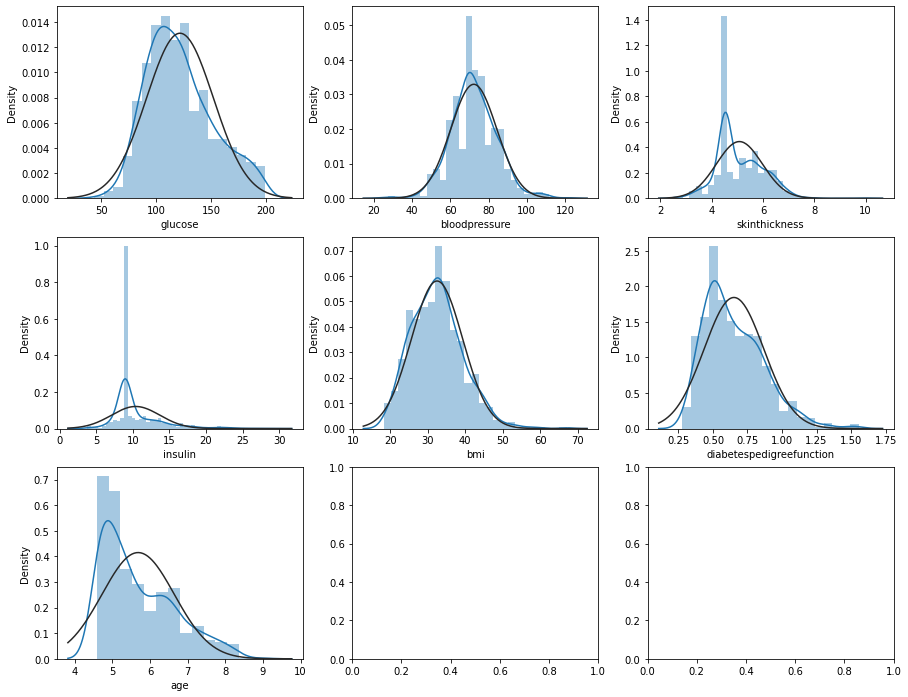

In [777]:
fig,ax = plt.subplots(3,3,figsize=(15,12))
for variable, subplot in zip(numerical_features,ax.flatten()):
  sns.distplot(df[variable],ax=subplot,fit=norm)

#### Selecting the dependent and independent variables

In [778]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Splitting the data into training and testing set

In [779]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature scaling

In [780]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1.Building the ANN

#### Initializing

In [781]:
import tensorflow as tf

In [782]:
ann = tf.keras.models.Sequential()

#### Adding the input layer and the first hidden layer

In [783]:
ann.add(tf.keras.layers.Dense(units=7,activation='relu'))

#### Adding the second hidden layer

In [784]:
ann.add(tf.keras.layers.Dense(units=7,activation='relu'))

#### Adding the output layer

In [785]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### 2.Training the ANN

#### Compiling the ANN

In [786]:
ann.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#### Training the ANN on the training set

In [787]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.6238
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6580
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6694
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6840
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7020
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7068
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7101
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7166
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7182
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7248
Epoch 11/

#### Predicting on the test set

In [788]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
df = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
result = pd.DataFrame(df,columns=['predicted','actual'])
result.head()

,predicted,actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


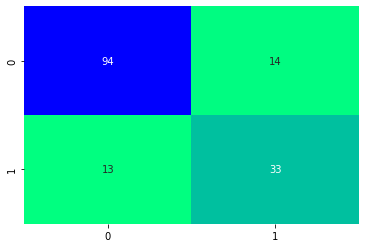

In [789]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='winter_r',cbar=False)

In [790]:
acs = accuracy_score(y_pred,y_test)
acs

0.8246753246753247

#### we have increased the accuracy from the previous logistic regression by 2%, we  could  create new features however without the expertise of a person in the field creating new features is not a good idea.